## Who is harassing

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
import calendar
import pickle
from cluster_analysis.graph import UndirectedGraph, Node, Edge

In [2]:
RUN = "run2"

In [3]:
hopped_data = pd.read_csv(f"{RUN}/hopped.csv")
hopped_data.columns = [
    "user",
    "hopped_from",
    "hopped_to",
    "content",
    "badge_info",
    "badges",
    "emotes",
    "flags",
    "id",
    "is_mod",
    "room_id",
    "is_subscriber",
    "tmi_sent_ts",
    "is_turbo",
    "user_type",
    "is_emote_only",
    "bits",
    "sent_ts",
    "timestamp",
    "messages_in_from",
    "vader_neg",
    "vader_neu",
    "vader_pos",
    "vader_compound",
    "toxicity"
]
hopped_data["combined_toxic"] = hopped_data.apply(lambda x: (x.vader_neg * 0.25 + x.toxicity * (1 - 0.25)) / 2, axis=1)

hopped_data.head()

,user,hopped_from,hopped_to,content,badge_info,badges,emotes,flags,id,is_mod,...,bits,sent_ts,timestamp,messages_in_from,vader_neg,vader_neu,vader_pos,vader_compound,toxicity,combined_toxic
0,the_derkman,tinakitten,pokimane,brucegPog brucegGoose xpereiKnife pokiO,subscriber/1,"['subscriber/0', 'premium/1']",301413172:0-8/301413225:10-20/303988437:22-32/...,[],e95a88a1-be66-402d-b322-c60216a71c42,False,...,NaN,NaN,1.602568e+09,4,0.0,1.0,0.0,0.0000,0.024571,0.009214
1,the_derkman,tinakitten,pokimane,brucegGoose pokiBAN xpereiKnife pokiO,subscriber/1,"['subscriber/0', 'premium/1']",301413225:0-10/1477137:12-18/303988437:20-30/1...,[],50427bf1-ed69-431e-bd83-4fe738402271,False,...,NaN,NaN,1.602568e+09,4,0.0,1.0,0.0,0.0000,0.024571,0.009214
2,the_derkman,tinakitten,ariasaki,Heh,NaN,['premium/1'],NaN,[],f7474696-200c-48f1-b2c5-1862766e2ecc,False,...,NaN,NaN,1.602568e+09,4,1.0,0.0,0.0,-0.1531,0.399571,0.274839
3,the_derkman,tinakitten,ariasaki,brucegGoose xpereiKnife pokiO pokiPOP,NaN,['premium/1'],301413225:0-10/303988437:12-22/1772976:24-28/1...,[],5151962a-be7b-47c1-bdca-483ce25d420f,False,...,NaN,NaN,1.602568e+09,4,0.0,1.0,0.0,0.0000,0.024571,0.009214
4,the_derkman,tinakitten,pokimane,pokiWater brucegGoose xpereiKnife pokiO,subscriber/1,"['subscriber/0', 'premium/1']",303988437:22-32/1772976:34-38/172959:0-8/30141...,[],1c6bcbb1-2b0a-45c4-babf-728aa0d9a4ba,False,...,NaN,NaN,1.602568e+09,4,0.0,1.0,0.0,0.0000,0.024571,0.009214


In [4]:
toxic_hopped = hopped_data[hopped_data["combined_toxic"] > 0.19]
print(len(toxic_hopped))
toxic_hopped.head()

61527


,user,hopped_from,hopped_to,content,badge_info,badges,emotes,flags,id,is_mod,...,bits,sent_ts,timestamp,messages_in_from,vader_neg,vader_neu,vader_pos,vader_compound,toxicity,combined_toxic
2,the_derkman,tinakitten,ariasaki,Heh,NaN,['premium/1'],NaN,[],f7474696-200c-48f1-b2c5-1862766e2ecc,False,...,NaN,NaN,1.602568e+09,4,1.000,0.000,0.0,-0.1531,0.399571,0.274839
5,the_derkman,pokimane,tinakitten,Heh,NaN,['premium/1'],NaN,[],d3248a80-5013-45a2-ad84-a5b27c9dfbc7,False,...,NaN,NaN,1.602568e+09,4,1.000,0.000,0.0,-0.1531,0.399571,0.274839
43,savaged_boi_xd,tinakitten,masayoshi,Oh no,NaN,[],NaN,[],ce1ffb3a-5963-4a48-8a2f-3c768313f1a2,False,...,NaN,NaN,1.602569e+09,8,0.688,0.312,0.0,-0.2960,0.289748,0.194656
58,the_derkman,pokimane,masayoshi,Heh,NaN,['premium/1'],NaN,[],b6a97ac9-ce21-4c9a-832a-beafbf847185,False,...,NaN,NaN,1.602569e+09,7,1.000,0.000,0.0,-0.1531,0.399571,0.274839
76,xafrire,sykkuno,natsumiii,3 More kill ... monkaW,NaN,['glhf-pledge/1'],NaN,[],bf701253-8306-4406-936d-1466273660c9,False,...,NaN,NaN,1.602569e+09,3,0.625,0.375,0.0,-0.7178,0.344699,0.207387


In [5]:
toxic_hopped["user"].value_counts()

legendiary1        75
sunshineaakayla    71
brindend           66
jaquan_russel_     55
khalty             53
                   ..
akatookey           1
jarvi17             1
imeighties          1
wolfman22__         1
bl3ss3d_cl3ric      1
Name: user, Length: 39769, dtype: int64

In [6]:
def accounted_users(df, threshold):
    count = 0
    sum_ = 0
    value_counts = df["user"].value_counts()
    while sum_ / len(value_counts) < threshold:
        sum_ += value_counts[count]
        count += 1
    return count

In [39]:
threshold = 0.99
count = accounted_users(toxic_hopped, threshold)
user_count = len(set(toxic_hopped["user"]))

print(f"{count} users ({int(count / user_count * 100)}% of users) "
      f"account for {threshold * 100}% of the harassment")

17614 users (44% of users) account for 99.0% of the harassment


## groups

In [8]:
groups = pickle.load(open("cluster_analysis/groups.pickle", "rb"))

In [46]:
threshold = 0.8

counts = []

for group in groups:
    print("------------------------------------------------")
    print("group: ")
    print(group)
    print()
    
    toxic_in_group = toxic_hopped[toxic_hopped["hopped_to"].isin(group)]
    
    count = accounted_users(toxic_in_group, threshold)
    user_count = len(set(toxic_in_group["user"]))
    
    counts.append((count, count / user_count * 100))
    
    print(f"{count} users ({int(count / user_count * 100)}% of users) "
      f"account for {threshold * 100}% ({int(threshold * len(toxic_in_group))} / {len(toxic_in_group)}) of the harassment")

------------------------------------------------
group: 
{'spazmotv', 'frangabang', 'slayergirl_au'}

5 users (71% of users) account for 80.0% (6 / 8) of the harassment
------------------------------------------------
group: 
{'elasticdroid', 'bigpuffer', 'pezzzy'}

50 users (72% of users) account for 80.0% (60 / 75) of the harassment
------------------------------------------------
group: 
{'xlix', 'alsoviral', 'gorb'}

21 users (65% of users) account for 80.0% (29 / 37) of the harassment
------------------------------------------------
group: 
{'xlie', '100kbandit', 'dnelltv', 'stahtistics_', 'tio2k'}

50 users (64% of users) account for 80.0% (71 / 89) of the harassment
------------------------------------------------
group: 
{'joltaye', 'yassjordan', 'ivycakezz'}

1 users (25% of users) account for 80.0% (6 / 8) of the harassment
------------------------------------------------
group: 
{'drg_games', 'superphonic', 'kikilowe'}

3 users (13% of users) account for 80.0% (32 / 41) of t

12 users (66% of users) account for 80.0% (16 / 21) of the harassment
------------------------------------------------
group: 
{'sgk7gaming', 'flacojordi_', 'lospollostv', 'mizzskrillex', 'annoying', 'kot4q', 'chaoticallure', 'yourragegaming', 'blackcrosses', 'cheeseaholic', 'adinross', 'bigex', 'silky', 'whosmini', 'kobe0802', 'switchupnext'}

471 users (52% of users) account for 80.0% (908 / 1135) of the harassment
------------------------------------------------
group: 
{'ayka', 'x33n', 'rachelanita', 'pjonkgoose'}

21 users (53% of users) account for 80.0% (40 / 50) of the harassment
------------------------------------------------
group: 
{'itsfosty', 'tdcgaming10', 'austbot43', 'dniceforever', 'paintedladyc', 'cyborgbaron', 'mzviciouzz'}

117 users (65% of users) account for 80.0% (165 / 207) of the harassment
------------------------------------------------
group: 
{'theflood', 'drnkie', 'feed_247'}

2 users (66% of users) account for 80.0% (3 / 4) of the harassment
------------

100 users (56% of users) account for 80.0% (173 / 217) of the harassment


In [47]:
np.average([len(group) for group in groups])

6.2727272727272725

In [67]:
t_groups = [c for c in counts if c[1] < 60]
t_groups

[(1, 25.0),
 (3, 13.043478260869565),
 (4, 30.76923076923077),
 (5, 35.714285714285715),
 (19, 59.375),
 (13, 41.935483870967744),
 (4, 57.14285714285714),
 (8, 57.14285714285714),
 (6, 16.666666666666664),
 (7, 33.33333333333333),
 (13, 59.09090909090909),
 (5, 19.230769230769234),
 (1, 50.0),
 (23, 38.333333333333336),
 (40, 42.5531914893617),
 (18, 42.857142857142854),
 (72, 59.50413223140496),
 (471, 52.80269058295964),
 (21, 53.84615384615385),
 (117, 55.714285714285715),
 (4, 57.14285714285714),
 (10, 31.25),
 (5, 50.0),
 (2, 11.11111111111111),
 (16, 30.18867924528302),
 (16, 59.25925925925925),
 (7, 58.333333333333336),
 (29, 51.78571428571429),
 (1548, 25.774225774225773),
 (3078, 53.38189386056192),
 (1637, 58.84255930984903),
 (1306, 57.205431449846685),
 (1260, 51.03280680437424),
 (543, 58.95765472312704),
 (39, 45.348837209302324),
 (12, 21.428571428571427),
 (35, 55.55555555555556),
 (104, 58.42696629213483),
 (59, 36.875),
 (100, 56.81818181818182)]

In [68]:
len(t_groups)

40

## groups plot

In [15]:
graph = UndirectedGraph()

for group in groups:
    for user in group:
        graph.add_node(Node(user))
    for user1 in group:
        for user2 in group:
            graph.add_edge(Edge([user1, user2]))

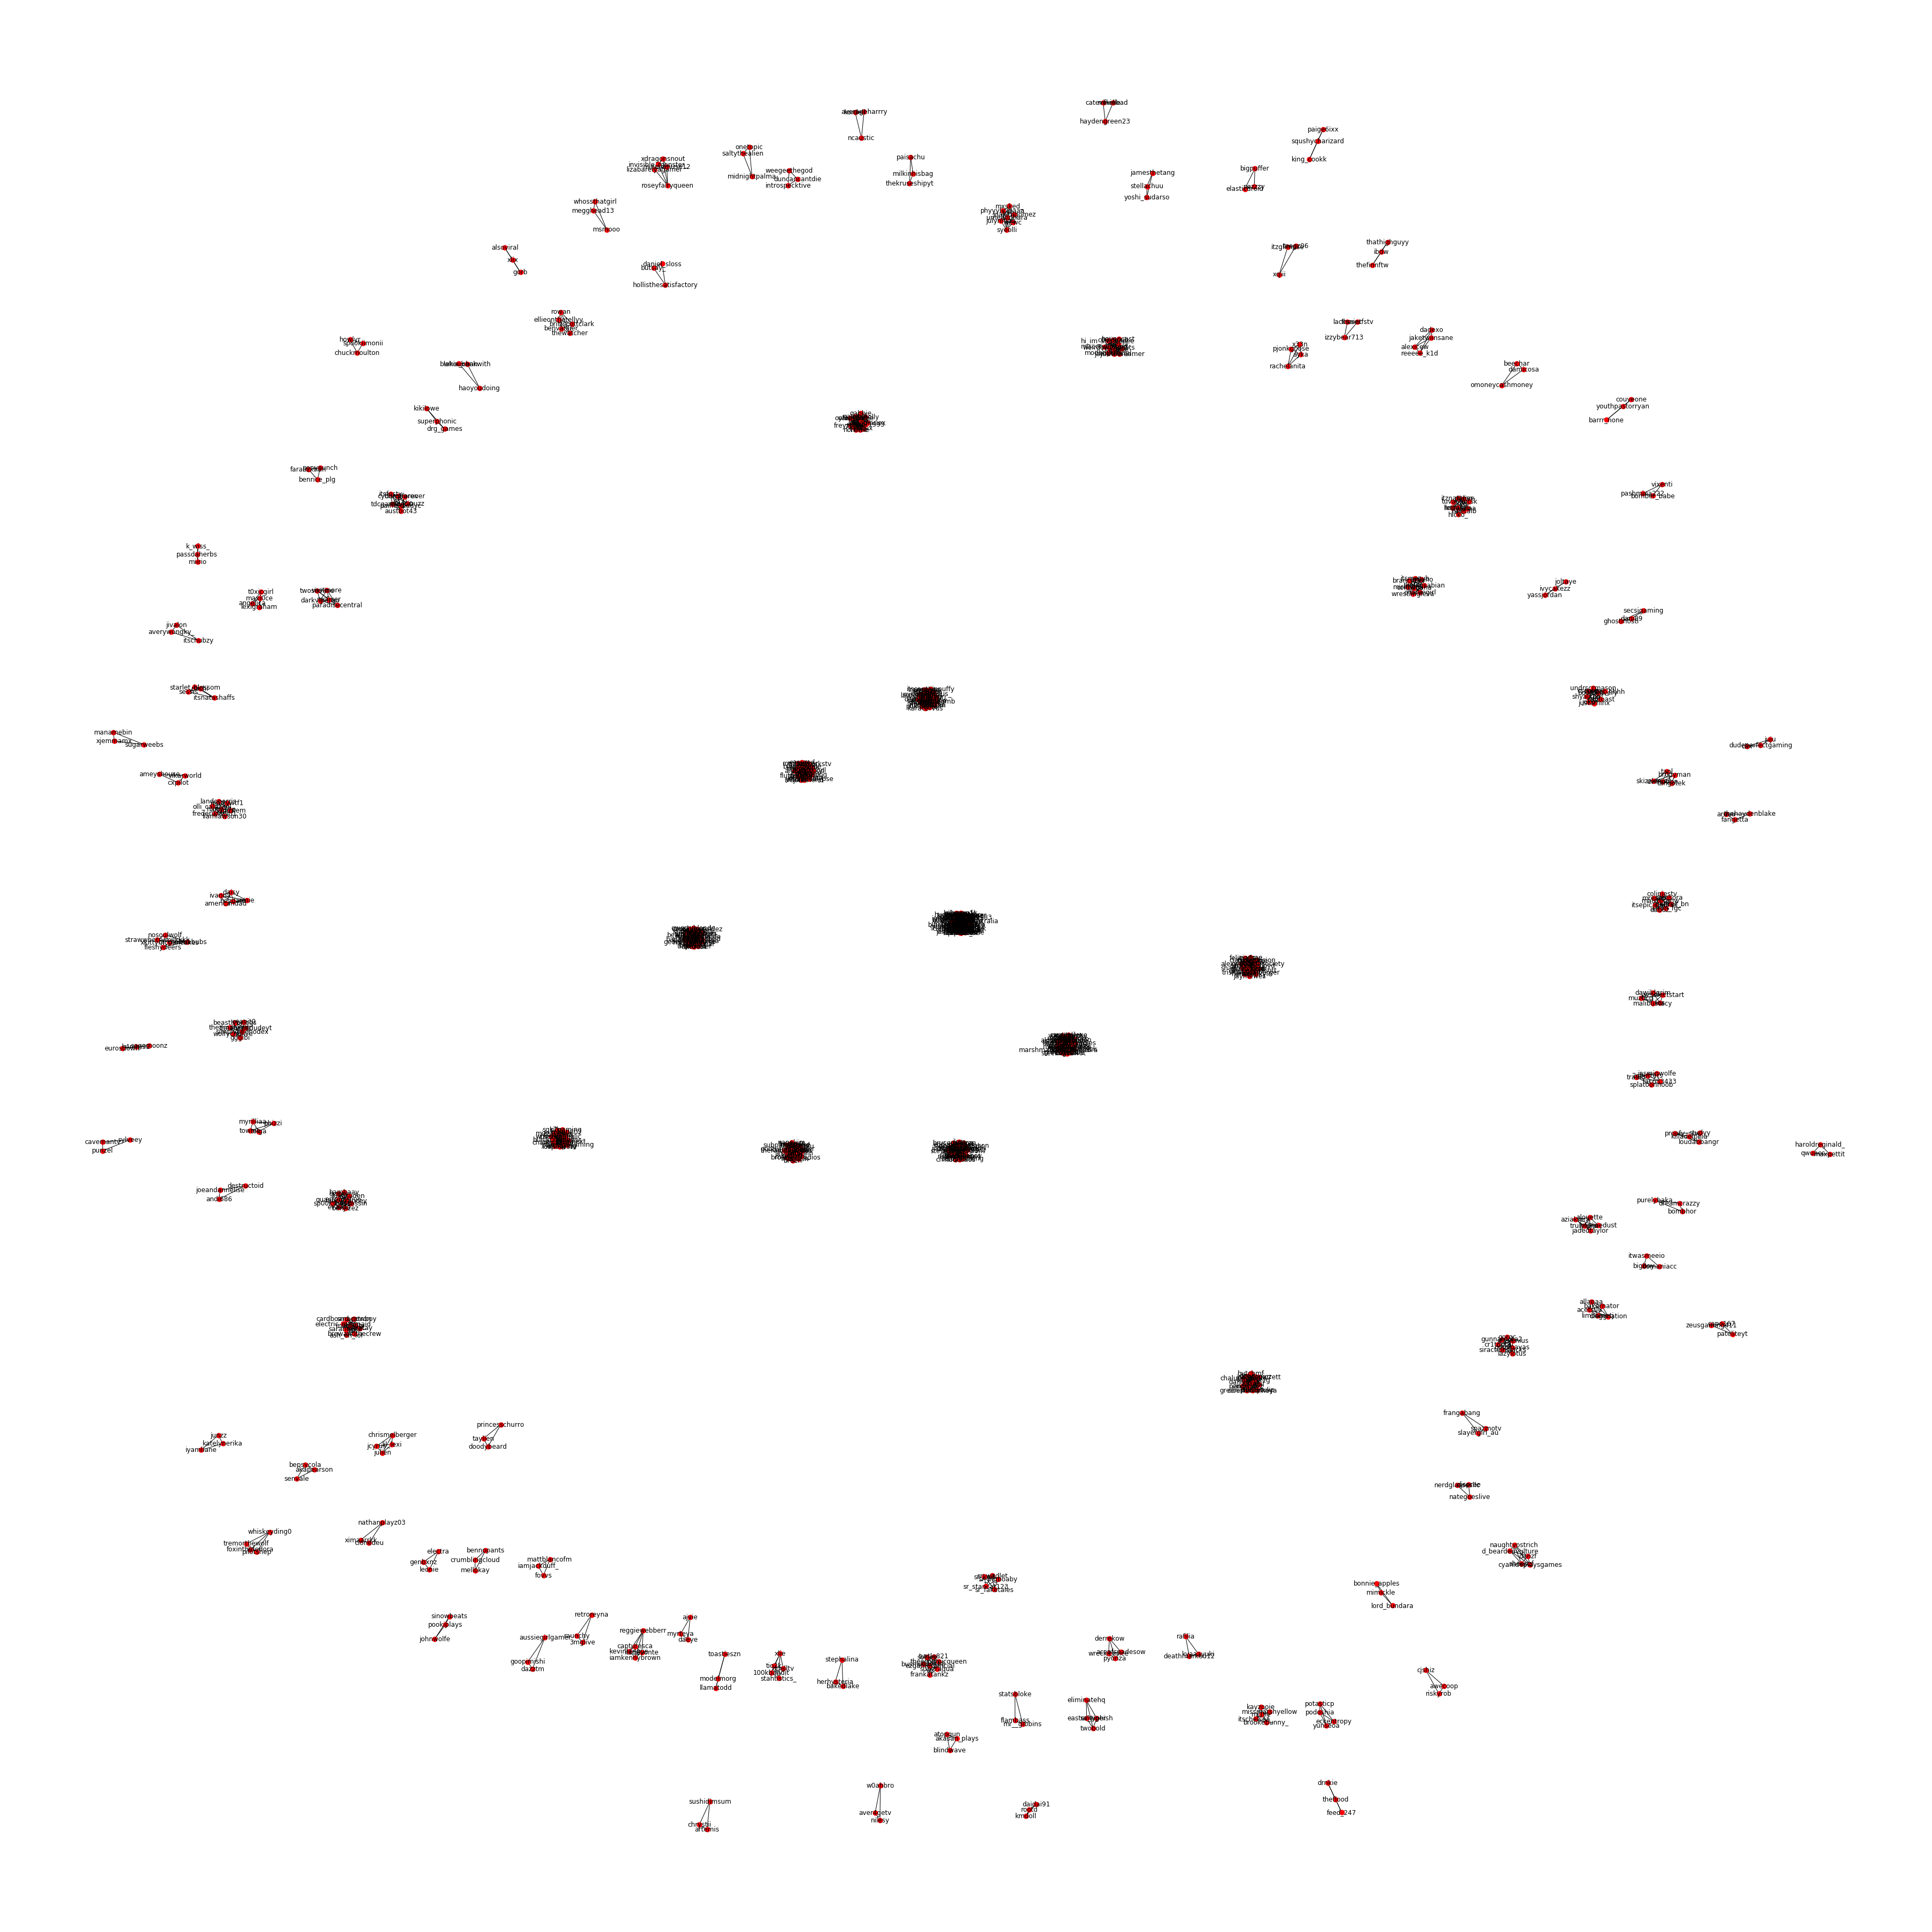

In [22]:
graph.plot(scale=0.1)

In [29]:
train_group = [g for g in graph.disconnected_graphs() if "trainwreckstv" in g.nodes][0]

In [33]:
group_activity = [len(hopped_data[hopped_data["hopped_to"].isin(s) & hopped_data["hopped_from"].isin(s)]) for s in graph.disconnected_groups()]

In [34]:
np.average(group_activity)

2453.327272727273

In [35]:
np.min(group_activity)

4

In [36]:
np.max(group_activity)

105857